# <span style = "color:green">Feature Selection</span>

***

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

###  Model Refinement Using RFE
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

Here, we will use RFE with the Logistic Regression classifier to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [ ]:
pearson Correlation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df=pd.read_csv('water_potability.csv')

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


<Axes: >

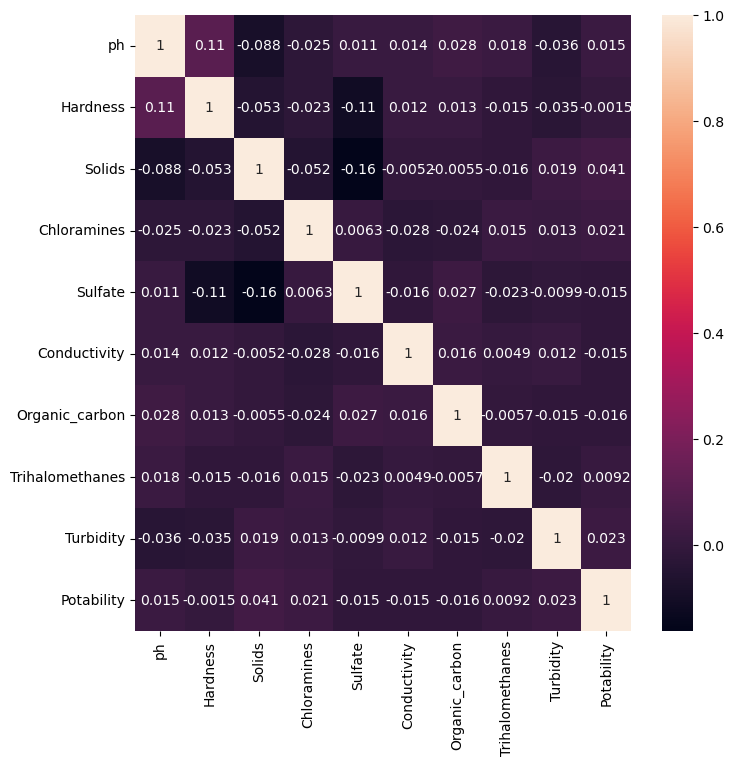

In [13]:
plt.figure(figsize =(8,8))
sns.heatmap(df.corr(),annot=True)

In [19]:
correlations=df.corr()
correlations

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


In [30]:
correlations=df.corr().loc['Potability']
pd.DataFrame(correlations)


,Potability
ph,0.014530
Hardness,-0.001505
Solids,0.040674
Chloramines,0.020784
Sulfate,-0.015303
Conductivity,-0.015496
Organic_carbon,-0.015567
Trihalomethanes,0.009244
Turbidity,0.022682
Potability,1.000000


In [33]:
correlations = correlations.apply(lambda x: abs(x))
correlations

ph                 0.014530
Hardness           0.001505
Solids             0.040674
Chloramines        0.020784
Sulfate            0.015303
Conductivity       0.015496
Organic_carbon     0.015567
Trihalomethanes    0.009244
Turbidity          0.022682
Potability         1.000000
Name: Potability, dtype: float64

In [35]:
correlations.sort_values(ascending=False)

Potability         1.000000
Solids             0.040674
Turbidity          0.022682
Chloramines        0.020784
Organic_carbon     0.015567
Conductivity       0.015496
Sulfate            0.015303
ph                 0.014530
Trihalomethanes    0.009244
Hardness           0.001505
Name: Potability, dtype: float64

In [ ]:
#recursive feature elimination (RFE)

In [38]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [39]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)

In [46]:
X=df.drop(columns=['Potability'])
y=df['Potability']

In [47]:

# X is the input and y is the target variable
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [False False False False  True  True  True  True False]
Feature Ranking: [6 2 3 4 1 1 1 1 5]


<b> OUTPUT</b>

Num Features: 3

Selected Features: [ True False False False False  True  True False]

Feature Ranking: [1 2 3 5 6 1 1 4]

***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>